## 연습문제 : 인구구조 비슷한 지역 찾기 (Q5.3)
- Q5.2 문제를 pandas 로 읽어서 처리해본다

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 대치1동


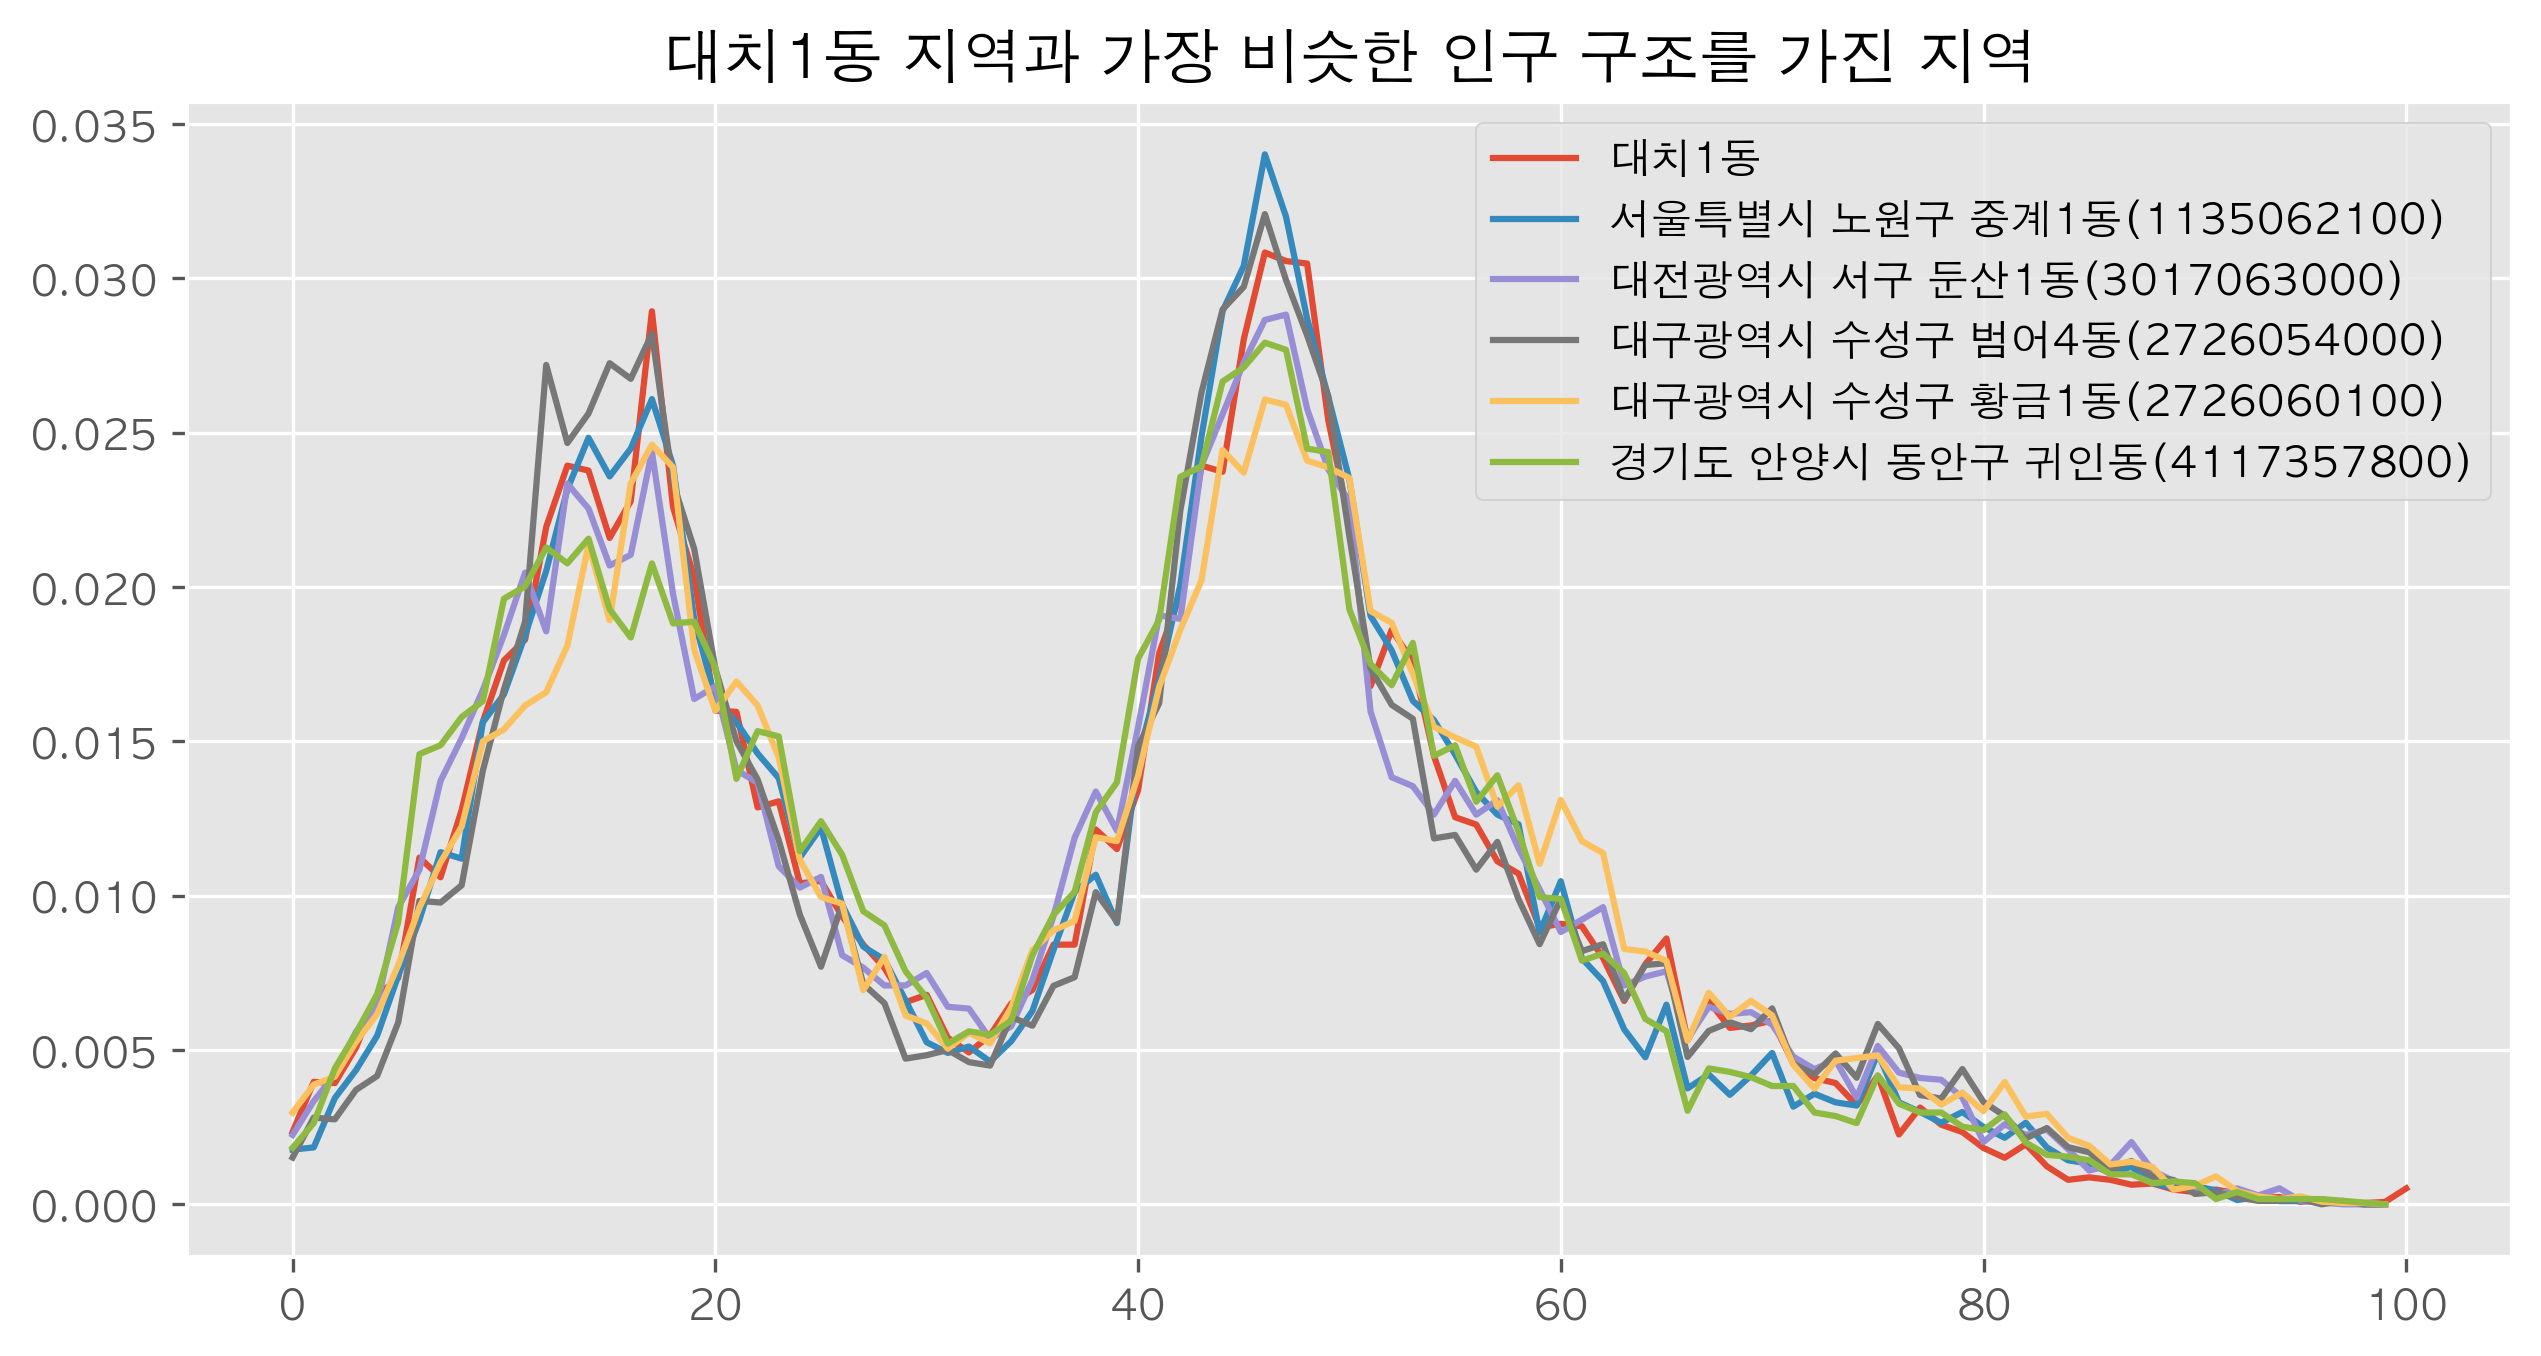

In [374]:
import numpy as np
import pandas as pd

age_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/week05/age.csv'

# 1. 데이터 읽기
df = pd.read_csv(age_path, encoding='cp949')

# 2. 궁금한 지역의 이름 입력
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
mn = 1           # 최솟값
result_name = '' # 최솟값 지역명
result = 0       # 최솟값 지역의 연령대별 인구 비율


# 3. 궁금한 지역의 인구 구조 저장
home_index = (df.loc[df['행정구역'].str.contains(name)]).index.values[0]
home_all = home['총인구수'][home_index]
home_list = (home.loc[:, '0세':'100세 이상']).div(home_all)
home_serise = home_list.squeeze()

#4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
# 나이별 인구 비율 구하기
df.loc[:, '0세':'100세 이상'] = df.loc[:, '0세':'100세 이상'].div(df['총인구수'], axis = 0)
save_df = df.copy()

# (home - away)**2
df.loc[:, '0세':'100세 이상'] = df.loc[:, '0세':'100세 이상'].sub(home_serise, axis = 1) ** 2
# 열끼리 더하기
sum_list = df.loc[:, '0세':'100세 이상'].sum(axis=1)
# sum 컬럼 추가
save_df['sum_list'] = sum_list

# 정렬
save_df = save_df.sort_values('sum_list', ascending=True)

result_list = save_df[1:6].values.tolist()

# 5. 궁금한 지역의 인구 구조와 가장 비슷한 곳의 인구 구조를 시각화
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)            
plt.rcParams['font.family'] = 'AppleGothic'
plt.title(name +' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home_list.values.tolist()[0], label = name)
plt.plot(result_list[0][3:-2], label = result_list[0][0:1][0])
plt.plot(result_list[1][3:-2], label = result_list[1][0:1][0])
plt.plot(result_list[2][3:-2], label = result_list[2][0:1][0])
plt.plot(result_list[3][3:-2], label = result_list[3][0:1][0])
plt.plot(result_list[4][3:-2], label = result_list[4][0:1][0])
plt.legend()
plt.show()